/usr/lib/python3/dist-packages/mpl_toolkits/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__('pkg_resources').declare_namespace(__name__)


vmcircbuf_prefs::get :info: /home/ubuntu/.gnuradio/prefs/vmcircbuf_default_factory failed to open: bad true, fail true, eof true


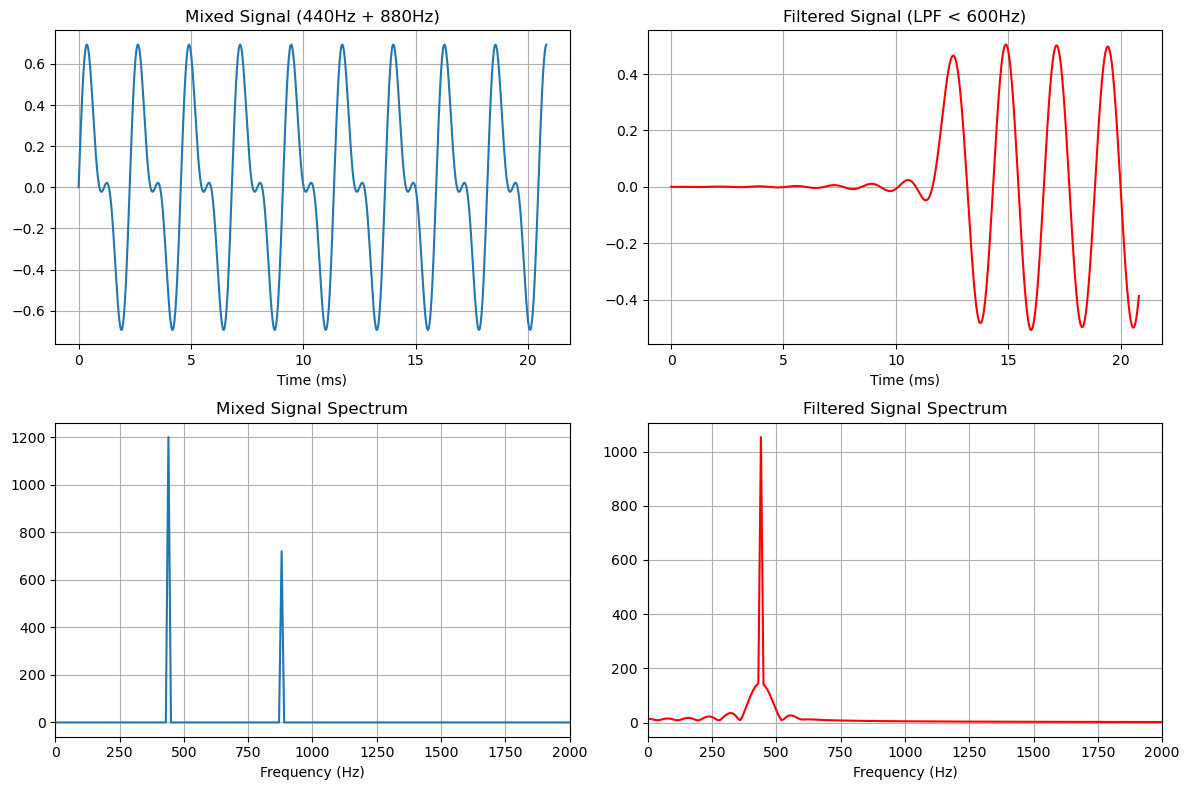

✅ GNU Radio test complete!


In [1]:
# Complete GNU Radio Test
import sys
sys.path.append('/usr/lib/python3/dist-packages')
sys.path.append('/usr/local/lib/python3/dist-packages')

from gnuradio import gr, blocks, analog, filter
from gnuradio.filter import window
import numpy as np
import matplotlib.pyplot as plt

# Create flowgraph
tb = gr.top_block()
sample_rate = 48000

# Generate signals
sine1 = analog.sig_source_f(sample_rate, analog.GR_SIN_WAVE, 440, 0.5, 0)
sine2 = analog.sig_source_f(sample_rate, analog.GR_SIN_WAVE, 880, 0.3, 0)

# Mix signals
adder = blocks.add_ff()

# Create filter
taps = filter.firdes.low_pass(
    1.0,          # gain
    sample_rate,  # sampling rate
    600,          # cutoff frequency
    100,          # transition bandwidth
    window.WIN_HAMMING)  # window type
lpf = filter.fir_filter_fff(1, taps)

# Create sinks
sink_mixed = blocks.vector_sink_f()
sink_filtered = blocks.vector_sink_f()

# Connect everything
tb.connect(sine1, (adder, 0))
tb.connect(sine2, (adder, 1))
tb.connect(adder, blocks.head(gr.sizeof_float, 4800), sink_mixed)
tb.connect(adder, lpf, blocks.head(gr.sizeof_float, 4800), sink_filtered)

# Run
tb.start()
tb.wait()

# Plot results
mixed_data = np.array(sink_mixed.data())
filtered_data = np.array(sink_filtered.data())

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Time domain
time = np.arange(0, min(1000, len(mixed_data))) / sample_rate * 1000
axes[0, 0].plot(time, mixed_data[:len(time)])
axes[0, 0].set_title('Mixed Signal (440Hz + 880Hz)')
axes[0, 0].set_xlabel('Time (ms)')
axes[0, 0].grid(True)

axes[0, 1].plot(time, filtered_data[:len(time)], 'r')
axes[0, 1].set_title('Filtered Signal (LPF < 600Hz)')
axes[0, 1].set_xlabel('Time (ms)')
axes[0, 1].grid(True)

# Frequency domain
fft_mixed = np.fft.fft(mixed_data)
fft_filtered = np.fft.fft(filtered_data)
freqs = np.fft.fftfreq(len(mixed_data), 1/sample_rate)[:len(mixed_data)//2]

axes[1, 0].plot(freqs, np.abs(fft_mixed[:len(freqs)]))
axes[1, 0].set_title('Mixed Signal Spectrum')
axes[1, 0].set_xlabel('Frequency (Hz)')
axes[1, 0].set_xlim(0, 2000)
axes[1, 0].grid(True)

axes[1, 1].plot(freqs[:len(filtered_data)//2], 
                np.abs(fft_filtered[:len(filtered_data)//2]), 'r')
axes[1, 1].set_title('Filtered Signal Spectrum')
axes[1, 1].set_xlabel('Frequency (Hz)')
axes[1, 1].set_xlim(0, 2000)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print("✅ GNU Radio test complete!")